# UNET 8x8 3D de Emilio
Este modelo UNET ha sido entrenado con todas las imágenes del dataset imagenes_etiquetadas_8x8-002.csv de todas las turbinas.

## **Importación**

In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

#Data Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

#Neuronal Network API
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import *
from tensorflow.keras.regularizers import l2

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as mcolors

import os
import collections
from google.colab import drive

In [ ]:
%matplotlib inline
print(plt.style.available)
plt.style.use('seaborn-v0_8')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


## **Lectura**

In [ ]:
df_columns = pd.read_csv('/content/drive/MyDrive/TFG_modelado/datasets/imagenes_etiquetadas_8x8-002.csv', nrows=1)

In [ ]:
variables = ['Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', 'Blds_PitchAngle']
variables_id = ['Id', 'Fecha_Inicio', 'Fecha_Fin', 'label']

columns_read = [col for col in df_columns.columns if any([v in col for v in variables + variables_id])]
df = pd.read_csv('/content/drive/MyDrive/TFG_modelado/datasets/imagenes_etiquetadas_8x8-002.csv', usecols=columns_read)

In [ ]:
df

,Id,Fecha_Inicio,Fecha_Fin,label,Amb_WindSpeed_Avg_1,Amb_WindSpeed_Avg_2,Amb_WindSpeed_Avg_3,Amb_WindSpeed_Avg_4,Amb_WindSpeed_Avg_5,Amb_WindSpeed_Avg_6,...,Blds_PitchAngle_Avg_55,Blds_PitchAngle_Avg_56,Blds_PitchAngle_Avg_57,Blds_PitchAngle_Avg_58,Blds_PitchAngle_Avg_59,Blds_PitchAngle_Avg_60,Blds_PitchAngle_Avg_61,Blds_PitchAngle_Avg_62,Blds_PitchAngle_Avg_63,Blds_PitchAngle_Avg_64
0,1,2009-07-08 15:20:00,2009-07-09 02:30:00,5,0.4,0.4,0.4,0.4,0.4,0.4,...,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4
1,1,2009-07-09 02:30:00,2009-07-09 13:10:00,0,5.6,5.9,5.9,6.6,5.6,5.4,...,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4,89.4
2,1,2009-07-09 13:10:00,2009-07-09 23:50:00,5,4.1,3.6,5.8,6.7,6.0,5.0,...,89.5,89.5,89.5,89.5,89.5,89.5,89.5,89.5,89.5,89.5
3,1,2009-07-09 23:50:00,2009-07-10 10:30:00,0,3.3,3.3,2.9,2.6,2.7,2.7,...,43.1,57.6,77.9,79.0,79.7,89.4,89.5,89.5,84.4,65.3
4,1,2009-07-10 10:30:00,2009-07-10 21:10:00,5,3.6,3.7,4.7,4.2,5.5,2.6,...,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0,86.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791350,25,2017-03-08 03:20:00,2017-03-08 14:00:00,0,5.6,6.0,6.6,8.1,7.8,8.3,...,24.0,24.0,24.0,24.0,12.8,14.5,17.3,13.0,18.4,-0.1
791351,25,2017-03-08 14:00:00,2017-03-09 00:40:00,0,3.5,3.8,3.8,3.6,3.0,3.3,...,-0.6,15.2,24.0,24.0,24.0,24.0,24.0,24.0,24.0,24.0
791352,25,2017-03-09 00:40:00,2017-03-09 11:20:00,0,3.5,3.4,3.2,3.5,4.0,3.9,...,24.0,4.9,-0.6,-0.4,0.0,0.0,-0.8,-0.6,-0.3,-1.2
791353,25,2017-03-09 11:20:00,2017-03-09 22:00:00,0,5.5,6.4,6.1,5.6,6.1,5.8,...,-2.2,-2.2,-2.2,-2.1,-2.0,-2.0,-2.0,-2.0,-1.9,-2.0


In [ ]:
print(collections.Counter(df['label']))

Counter({0: 678981, -1: 57424, 1: 44104, 5: 5157, 2: 3532, 3: 2157})


## **Preprocesado**

In [ ]:
df['label'] = df['label'] + 1
df.loc[(df['label']==6),'label'] = 5
y_train = df['label'].values

In [ ]:
y_train.shape

(791355,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
values = scaler.fit_transform(df[[col for col in df.columns if any([v in col for v in variables])]].values)

In [ ]:
values_swap = np.swapaxes(values.reshape(-1,3,8,8),1,3)

In [ ]:
values_swap.shape

(791355, 8, 8, 3)

In [ ]:
X_train = values_swap

In [ ]:
counters = collections.Counter(df['label'])
print(counters)

Counter({1: 678981, 0: 57424, 2: 44104, 5: 5157, 3: 3532, 4: 2157})


**Balanceo de los datos para el entrenaminento**

In [ ]:
from collections import deque
import numpy as np
#Se corresponden con las labels antiguas mas 1
count0 = 0
count1 = 0
count2 = 0
count3 = 0
count4 = 0
count5 = 0

mode = 'balanced'
samples = (counters[3]+counters[4]+counters[5])

lists = deque()
list_grid = deque()
label_list = deque()
for i in range(X_train.shape[0]):
    if mode=='balanced':
        #Cojo un 5% mas de las etiquetas 0 y 1 (-1 y 0 respectivamente)
        if(df.loc[i,'label']==0 and count0<(0.7*samples)):
            lists.append(X_train[i])
            label_list.append(df.loc[i, 'label'])
            count0+=1
        if(df.loc[i,'label']==1 and count1<(0.7*samples)):
            lists.append(X_train[i])
            label_list.append(df.loc[i, 'label'])
            count1+=1
        if(df.loc[i,'label']==2 and count2<(0.7*samples)):
            lists.append(X_train[i])
            label_list.append(df.loc[i, 'label'])
            count2+=1
        if(df.loc[i,'label']==3 and count3<samples):
            lists.append(X_train[i])
            label_list.append(df.loc[i, 'label'])
            count3+=1
        if(df.loc[i,'label']==4 and count4<samples):
            lists.append(X_train[i])
            label_list.append(df.loc[i, 'label'])
            count4+=1
        if(df.loc[i,'label']==5 and count5<(0.7*samples)):
            lists.append(X_train[i])
            label_list.append(df.loc[i, 'label'])
            count5+=1
    else:
        lists.append(X_train[i])
        label_list.append(df.loc[i, 'label'])

X_train = np.array(lists)
y_train = np.array(label_list)

In [ ]:
print(collections.Counter(y_train))

Counter({1: 7593, 2: 7593, 0: 7593, 5: 5157, 3: 3532, 4: 2157})


In [ ]:
X_train.shape

(33625, 8, 8, 3)

In [ ]:
X_train =  tf.image.resize_with_pad(X_train, 16, 16, method='bicubic')
X_train = X_train.numpy().astype('float32')

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train,num_classes=6)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.1, shuffle=True, random_state=16)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True, random_state=42)

## **Modelo**

In [ ]:
def build_model(input_layer=Input((16,16,3)), start_neurons=16):
    """Define la arquitectura U-Net"""
    drop_rate_hidden = 0.2

    #Convolution
    conv1 = Conv2D(start_neurons * 4, (3, 3),activation='relu',padding="same",name='EncodeConv1_1')(input_layer)
    conv1 = Dropout(drop_rate_hidden)(conv1)
    conv1 = Conv2D(start_neurons * 4, (3, 3),activation='relu',padding="same",name='EncodeConv1_2')(conv1)
    pool1 = MaxPooling2D((2, 2),name='EncodeAveragePool1')(conv1)


    # Middle
    convm = Conv2D(start_neurons * 8, (3, 3),activation='relu',padding="same",name='BridgeConv_1')(pool1)
    convm = Dropout(drop_rate_hidden)(convm)
    convm = Conv2D(start_neurons * 8, (3, 3),activation='relu',padding="same",name='BridgeConv_2')(convm)

    #Upsampling

    deconv1 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same",name='DecodeUp1')(convm)
    uconv1 = concatenate([deconv1, conv1], axis=3,name='Concat1')

    uconv1 = Conv2D(start_neurons * 4, (3, 3),activation='relu',padding="same",name='DecodeConv1_1')(uconv1)
    uconv1 = Dropout(drop_rate_hidden)(uconv1)
    uconv1 = Conv2D(start_neurons * 4, (3, 3),activation='relu',padding="same",name='DecodeConv1_2')(uconv1)
    uconv1 = Dropout(drop_rate_hidden)(uconv1)


    #Aplanamiento de los tensores
    uconv1 = Flatten(name='Flattening')(uconv1)


    dense1 = Dense(64,activation='relu')(uconv1)
    dense1 = Dropout(drop_rate_hidden)(dense1)

    dense2 = Dense(32,activation='relu')(dense1)
    dense2 = Dropout(drop_rate_hidden)(dense2)



    output_layer = Dense(6, activation='softmax',name='Classifier')(dense2)

    unet = tf.keras.Model(input_layer, output_layer,name='UNet')

    return unet

In [ ]:
unet = build_model()

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-8)


unet.compile(optimizer=tf.keras.optimizers.Adam()
, loss="categorical_crossentropy", metrics=['accuracy','Precision'])

In [ ]:
history = unet.fit(X_train, y_train, batch_size=128, validation_data=(X_val,y_val), callbacks=[reduce_lr,early_stopping], epochs=100, verbose=1)

Epoch 1/100
178/178 [==============================] - 14s 27ms/step - loss: 1.1047 - accuracy: 0.5585 - precision: 0.7772 - val_loss: 0.8417 - val_accuracy: 0.6626 - val_precision: 0.7157 - lr: 0.0010
Epoch 2/100
178/178 [==============================] - 4s 20ms/step - loss: 0.5923 - accuracy: 0.7706 - precision: 0.8224 - val_loss: 0.4154 - val_accuracy: 0.8368 - val_precision: 0.8538 - lr: 0.0010
Epoch 3/100
178/178 [==============================] - 4s 21ms/step - loss: 0.4300 - accuracy: 0.8330 - precision: 0.8546 - val_loss: 0.3677 - val_accuracy: 0.8633 - val_precision: 0.8887 - lr: 0.0010
Epoch 4/100
178/178 [==============================] - 4s 21ms/step - loss: 0.3865 - accuracy: 0.8524 - precision: 0.8716 - val_loss: 0.3320 - val_accuracy: 0.8680 - val_precision: 0.8749 - lr: 0.0010
Epoch 5/100
178/178 [==============================] - 4s 21ms/step - loss: 0.3562 - accuracy: 0.8657 - precision: 0.8803 - val_loss: 0.4185 - val_accuracy: 0.8224 - val_precision: 0.8432 - lr: 0

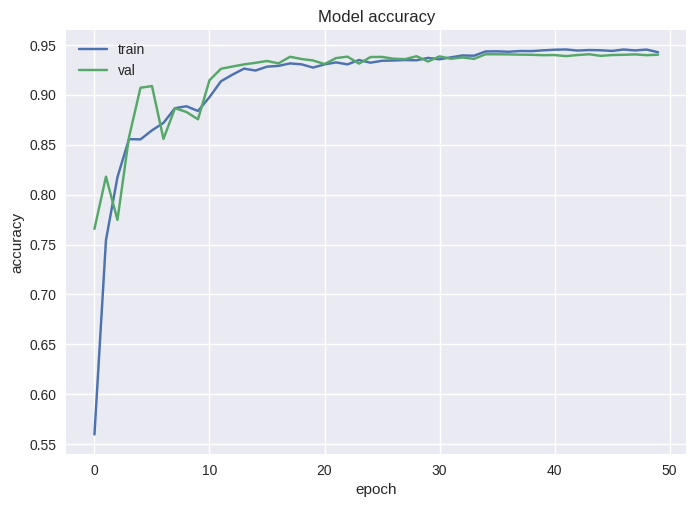

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('model_accuracy_3D_8x8.pdf', bbox_inches = 'tight')
plt.show()

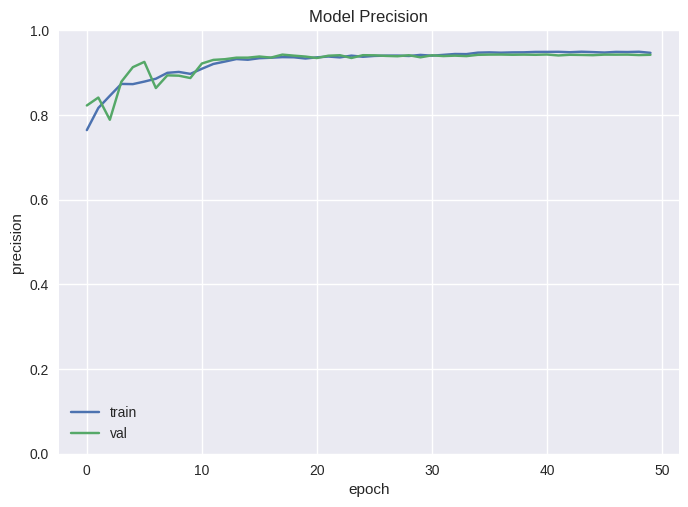

In [ ]:
# summarize history for accuracy
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('Model Precision')
plt.ylim(0,1)
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('model_precision_3D_8x8.pdf', bbox_inches = 'tight')
plt.show()

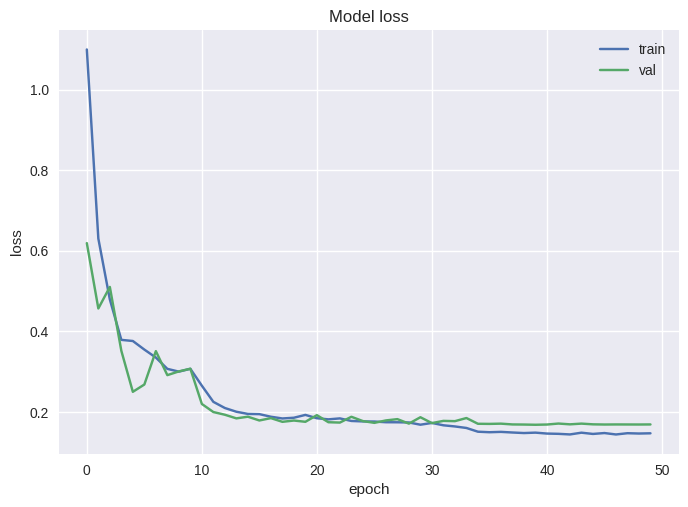

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.savefig('model_loss_3D_8x8.pdf', bbox_inches = 'tight')
plt.show()

**Matriz de confusión**

106/106 [==============================] - 1s 4ms/step


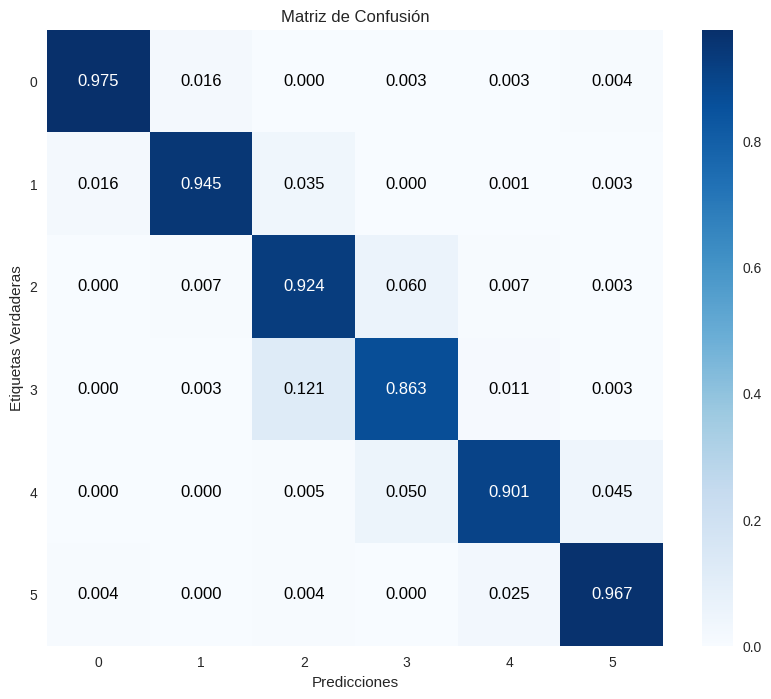

In [ ]:
from sklearn import metrics

labels = [0, 1, 2, 3, 4, 5]
predictions = unet.predict(X_test)
# Calcula la matriz de confusión
confusion_matrix = metrics.confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)

# Configura y muestra la matriz de confusión
plt.figure(figsize=(10, 8))
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Etiquetas Verdaderas')

for i in range(len(labels)):
    for j in range(len(labels)):
        text_color = "white" if confusion_matrix[i, j] > 0.5 else "black"  # Color blanco si el valor es alto
        plt.text(j, i, format(confusion_matrix[i, j], ".3f"),
                 ha="center", va="center", color=text_color, fontsize=12)

plt.imshow(confusion_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
plt.xticks(ticks=np.arange(len(labels)), labels=labels)
plt.yticks(ticks=np.arange(len(labels)), labels=labels)
plt.grid(False)  # Desactiva las líneas de la cuadrícula

plt.savefig('confusionMatrix_3D_8x8.pdf', bbox_inches = 'tight')

plt.show()


**Se guarda el modelo de etiquetado UNET para su posterior inferencia**

In [ ]:
# Guarda el modelo tanto los pesos como la arquitectura con formato .h5
unet.save('unet_8x8_3D_Emilio.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Se prueba a cargar el mismo modelo, con su arquitectura y pesos para la inferencia
load_model = tf.keras.models.load_model('unet_8x8_3D_Emilio.h5')
results = load_model.evaluate(X_test, y_test)
loss = results[0]
acc = results[1]
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
predictions = load_model.predict(X_test)

106/106 [==============================] - 1s 7ms/step


In [ ]:
print(predictions.shape)
probabilidades = predictions[0]
# Normaliza las probabilidades para que sumen 1 (probabilidad total)
probabilidades_normalizadas = probabilidades / np.sum(probabilidades)

print("Probabilidades normalizadas en formato decimal de la primera imagen del test set:\n")
for i, probabilidad in enumerate(probabilidades_normalizadas):
    print("["+str(i)+"]: " + "{:.4f}".format(probabilidad))

etiquetas_predichas = np.argmax(predictions, axis=1)

print("\nEtiquetas predichas:")
print(etiquetas_predichas)

(3363, 6)
Probabilidades normalizadas en formato decimal de la primera imagen del test set:

[0]: 0.0000
[1]: 0.0003
[2]: 0.9996
[3]: 0.0001
[4]: 0.0000
[5]: 0.0000

Etiquetas predichas:
[2 2 3 ... 1 4 0]


## **Generación del dataset completo de etiquetas**
- Se genera el dataset y se almacena en un .csv con el formato "etiqueta", "Id"; siendo "Id" el de la turbina eólica.

In [ ]:
df_columns = pd.read_csv('/content/drive/MyDrive/TFG_modelado/datasets/imagenes_etiquetadas_8x8-002.csv', nrows=1)
variables = ['Amb_WindSpeed_Avg', 'Grd_Prod_Pwr_Avg', 'Blds_PitchAngle']
variables_id = ['Id', 'Fecha_Inicio', 'Fecha_Fin', 'label']

columns_read = [col for col in df_columns.columns if any([v in col for v in variables + variables_id])]
df = pd.read_csv('/content/drive/MyDrive/TFG_modelado/datasets/imagenes_etiquetadas_8x8-002.csv', usecols=columns_read)

In [ ]:
print(collections.Counter(df['label']))

Counter({0: 678981, -1: 57424, 1: 44104, 5: 5157, 2: 3532, 3: 2157})


In [ ]:
df['label'] = df['label'] + 1
df.loc[(df['label']==6),'label'] = 5
y_train = df['label'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
values = scaler.fit_transform(df[[col for col in df.columns if any([v in col for v in variables])]].values)

In [ ]:
# Obtener la lista de IDs únicos de las turbinas
unique_ids = df['Id'].unique()
lote = 10000

# Crear un DataFrame vacío para almacenar las predicciones
df_prec = pd.DataFrame(columns=['etiqueta_rendimiento', 'Id'])

# Iterar sobre los IDs de las turbinas
for id_turbina in unique_ids:
    print(f"Generando datos de Turbina [{id_turbina}]")

    df_turbina = df[df['Id'] == id_turbina]  # Filtrar el DataFrame por la turbina actual

    values = scaler.transform(df_turbina[[col for col in df_turbina.columns if any([v in col for v in variables])]].values)
    values_swap = np.swapaxes(values.reshape(-1,3,8,8),1,3)

    X_train = values_swap
    counters = collections.Counter(df_turbina['label'])

    print(X_train.shape)
    print(counters)

    # Se preprocesan X_train y y_train
    X_train =  tf.image.resize_with_pad(X_train, 16, 16, method='bicubic')
    X_train = X_train.numpy().astype('float32')

    predictions3D = unet.predict(X_train)

    etiquetas_predichas = np.argmax(predictions3D, axis=1)

    df_turbina_prec = pd.DataFrame({'etiqueta_rendimiento': etiquetas_predichas})
    df_turbina_prec['Id'] = id_turbina  # Agregar ID correspondiente a la turbina actual

    # Concatenar el DataFrame de la turbina actual al DataFrame general
    df_prec = pd.concat([df_prec, df_turbina_prec], ignore_index=True)

# Verificar información del DataFrame resultante
df_prec.info()

Generando datos de Turbina [1]
(31167, 8, 8, 3)
Counter({1: 26480, 0: 3685, 2: 743, 5: 164, 4: 76, 3: 19})
974/974 [==============================] - 2s 2ms/step
Generando datos de Turbina [2]
(43740, 8, 8, 3)
Counter({1: 39202, 2: 2934, 0: 818, 5: 424, 3: 227, 4: 135})
1367/1367 [==============================] - 4s 3ms/step
Generando datos de Turbina [3]
(37473, 8, 8, 3)
Counter({1: 31280, 2: 4539, 0: 1001, 3: 391, 5: 159, 4: 103})
1172/1172 [==============================] - 3s 2ms/step
Generando datos de Turbina [4]
(31246, 8, 8, 3)
Counter({1: 26644, 0: 2876, 2: 1314, 5: 270, 3: 71, 4: 71})
977/977 [==============================] - 2s 2ms/step
Generando datos de Turbina [5]
(30933, 8, 8, 3)
Counter({1: 26432, 0: 2677, 2: 1308, 5: 294, 3: 145, 4: 77})
967/967 [==============================] - 2s 2ms/step
Generando datos de Turbina [6]
(36950, 8, 8, 3)
Counter({1: 32247, 0: 3420, 2: 1017, 5: 126, 3: 70, 4: 70})
1155/1155 [==============================] - 2s 2ms/step
Generando dat

In [ ]:
conteo_valores = df_prec['etiqueta_rendimiento'].value_counts()

print("Conteo de valores de cada clase:")
print(conteo_valores)

Conteo de valores de cada clase:
1    616007
0     88538
2     70026
3      6845
5      6689
4      3250
Name: etiqueta_rendimiento, dtype: int64


In [ ]:
coincidencias = 0

# Iterar sobre las filas utilizando zip
for etiqueta_df1, etiqueta_df2 in zip(df['label'], df_prec['etiqueta_rendimiento']):
    if etiqueta_df1 == etiqueta_df2:
        coincidencias += 1

In [ ]:
print("Coincidencias etiquetas predichas y reales: " + str(coincidencias))
print(len(df))
print(len(df_prec))

Coincidencias etiquetas predichas y reales: 721662
791355
791355


In [ ]:
# Guardamos el dataset de etiquetas predichas

In [ ]:
df_prec.to_csv('etiq_Emilio_8x8_3D_prediccion.csv', index=False)